FileNotFoundError: [Errno 2] No such file or directory: 'calib_10xPonto/calib6/calibration5s_file17-pt31.csv'

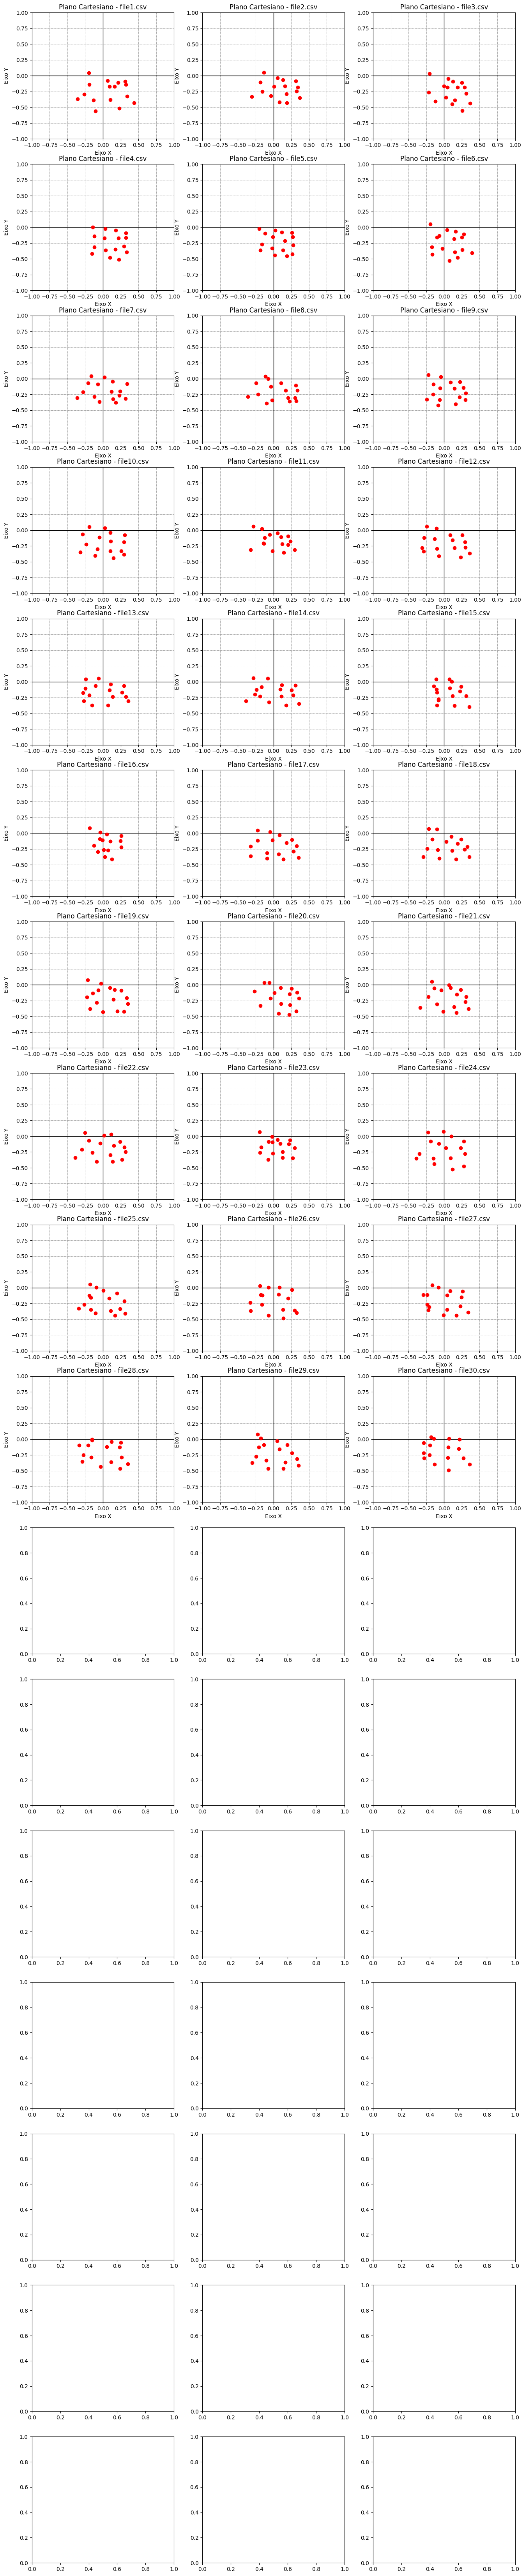

In [1]:
import matplotlib.pyplot as plt
import csv
import math

def convert_to_float(data):
    converted_data = []
    for row in data:
        converted_row = []
        for item in row[:2]:  # Considera apenas as duas primeiras colunas (X, Y)
            if item.startswith('[') and item.endswith(']'):
                item = item.strip('[]')
            converted_row.append(float(item))
        converted_data.append(converted_row)
    return converted_data

def plotar_dados(arquivos):
    num_arquivos = len(arquivos)
    num_colunas = 3
    num_linhas = math.ceil(num_arquivos / num_colunas)
    
    fig, axes = plt.subplots(num_linhas, num_colunas, figsize=(16, 5 * num_linhas))
    axes = axes.flatten()
    
    for i, arquivo in enumerate(arquivos):
        with open(arquivo, newline='') as f:
            reader = csv.reader(f)
            data = list(reader)
        data = [item for item in data if item]
        
        if not data:
            print(f"Arquivo {arquivo} está vazio ou não contém dados válidos.")
            continue

        data = convert_to_float(data)
        ax = axes[i]
        ax.axhline(0, color='black', linewidth=1)
        ax.axvline(0, color='black', linewidth=1)

        for x, y in data:
            ax.plot(x, y, 'ro')

        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.grid(color='gray', linestyle='--', linewidth=0.5)
        ax.set_xlabel('Eixo X')
        ax.set_ylabel('Eixo Y')
        ax.set_title(f'Plano Cartesiano - file{i+1}.csv')
    
    # Esconder eixos não utilizados, se houver
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()
if __name__ == "__main__":
    arquivos_csv = [f'calib_10xPonto/calib6/calibration5s_file17-pt{i}.csv' for i in range(1, 50)]  # Substitua pelo número desejado de arquivos
    plotar_dados(arquivos_csv)
    